<div style="display: flex; justify-content: space-between;width:100%; height:120px;align-items: center; padding:20px; box-sizing:border-box;">
    <h1 style="margin:0;padding:0;" >PyTorch</h1>
    <img src="https://upload.wikimedia.org/wikipedia/commons/c/c6/PyTorch_logo_black.svg" 
alt="PyTorch.log" style="height:110px;margin:0;passing:0;">
</div>

PyTorch is an optimized tensor library for deep learning using GPUs and CPUs.

The features of the documentation are classified as:
* *Stable*: These features will be maintained long-term
* *Beta*: These features are tagged as Beta because the API may change based on user feedback

The best ways to undertand how a package works is using simulate data and try in several situation

In [1]:
from torch import nn
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from operator import getitem

## Linear Algebra

In [2]:
torch.tensor([70])

tensor([70])

In [47]:
x = torch.rand(2, 4, 6) 
y = torch.rand(2, 6, 1)

In [52]:
x@y

tensor([[[2.6453],
         [1.0561],
         [2.2376],
         [2.2982]],

        [[1.8947],
         [1.7999],
         [1.4242],
         [1.5013]]])

In [56]:
x[1]@y[1]

tensor([[1.8947],
        [1.7999],
        [1.4242],
        [1.5013]])

In [406]:
# The function we are defined is 
# y = sin(x1*b1 + x2*b2) + 1.6 + e

size= 5_000
b = torch.tensor([1.2, 0.8])
x = torch.rand((size, 2))
e = torch.randn(size, 1)
y = torch.sin((x*b).sum(axis=1, keepdims=True)) + 1.6 + e


In [407]:
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [408]:
data = CustomDataset(x, y)
data_train, data_test = random_split(data, [0.8, 0.2])
data_train_loader = DataLoader(data_train, batch_size=10,shuffle=True)
data_test_loader = DataLoader(data_test, batch_size=10,shuffle=True)

In [409]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.stack = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        y_predict = self.stack(x)
        return y_predict

Using cpu device


In [410]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    # doesn't directly perform calculus itself, 
    # it sets a crucial flag that enables the model to learn through backpropagation,
    model.train()
    for batch_idx, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # The model returns the prediction using forward propagation
        pred = model(X)
        
        loss = loss_fn(pred, y)

        # sets all parameter gradients to zero.
        # Without resetting, gradients from previous backpropagation steps would accumulate,
        # leading to incorrect updates and potential model instability.
        optimizer.zero_grad()
        
        # It triggers the backpropagation process, 
        # Calculate the gradients of the loss with respect to the model's parameters.
        # and save the gradients in the model's parameters
        # To access to the gradients, you can pass
        # getitem(model.stack, 0).weight.grad
        loss.backward()
        
        # update the parameters
        optimizer.step()

        if batch_idx % 100 == 0:
            loss, cumm = loss.item(), batch_idx * len(X)
            print(f"loss: {loss:>7f}  [{cumm:>5d}/{size:>5d}]")

In [411]:
model = NeuralNetwork()
model.to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = range(5)
for eporch in epochs:
    train(data_train_loader, model, loss_fn, optimizer)
    
model.state_dict()

loss: 8.108708  [    0/ 4000]
loss: 3.099995  [ 1000/ 4000]
loss: 1.876426  [ 2000/ 4000]
loss: 2.374399  [ 3000/ 4000]
loss: 0.439486  [    0/ 4000]
loss: 0.685792  [ 1000/ 4000]
loss: 1.091935  [ 2000/ 4000]
loss: 1.518881  [ 3000/ 4000]
loss: 1.376373  [    0/ 4000]
loss: 0.485636  [ 1000/ 4000]
loss: 0.697991  [ 2000/ 4000]
loss: 1.591280  [ 3000/ 4000]
loss: 1.677449  [    0/ 4000]
loss: 0.524008  [ 1000/ 4000]
loss: 0.402611  [ 2000/ 4000]
loss: 1.216242  [ 3000/ 4000]
loss: 0.852296  [    0/ 4000]
loss: 1.603309  [ 1000/ 4000]
loss: 1.346547  [ 2000/ 4000]
loss: 0.786365  [ 3000/ 4000]


OrderedDict([('stack.0.weight',
              tensor([[-0.4876,  0.1538],
                      [ 0.1750,  0.1111],
                      [ 0.4104, -0.0481],
                      [ 0.1160, -0.1167],
                      [ 0.2747,  0.2686],
                      [ 0.6020, -0.6964],
                      [ 0.1112, -0.4851],
                      [ 0.2597,  0.1659],
                      [ 0.3146, -0.1387],
                      [ 0.0534,  0.5781]])),
             ('stack.0.bias',
              tensor([ 0.1089,  0.7959, -0.5062,  0.7522, -0.6520, -0.4923, -0.3553,  0.4368,
                      -0.1985, -0.1540])),
             ('stack.2.weight',
              tensor([[-0.0038,  0.7287,  0.0464,  0.3651,  0.0900,  0.0165, -0.3056,  0.4687,
                       -0.2441,  0.0749]])),
             ('stack.2.bias', tensor([1.1172]))])

### Working with data
There are two `classes` that we usually use to working with the data

<div align="center">
    <span style ="background-color:rgb(220, 220, 220);color:rgb(192, 57, 57)">torch.utils.data.DataLoader</span> and <span style="background-color:rgb(220, 220, 220);color:rgb(192, 57, 57)">torch.utils.data.Dataset </span>
</div>

`Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the Dataset


<!-- torch.utils.data.DataLoader and `torch.utils.data.Dataset. Dataset -->


In [412]:
from torch import nn
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

PyTorch offers domain-specific libraries such as `TorchText`, `TorchVision`, and `TorchAudio`, all of which include datasets. For this tutorial, we will be using a `TorchVision` dataset.

The `torchvision.datasets` module contains `Dataset` objects for many real-world vision data like `CIFAR`, `COCO`.

In this tutorial, we use the `FashionMNIST` dataset. Every TorchVision `Dataset` includes two arguments:

* `root` is the name of the directory where the files will be stored from the current directory.
* `train` is boolean type.
* `download` point out if we want to download or not
* `transform` and `target_transform` to modify the samples and labels respectively.


> `ToTensor()` Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8

In [413]:
training_data = datasets.FashionMNIST(
    root='data-pytorch',
    train=True,
    download=True,
    transform=ToTensor()
)


test_data = datasets.FashionMNIST(
    root='data-pytorch',
    train=False,
    download=True,
    transform=ToTensor()
)

To see the images that represent the data, we use the followinf code

In [415]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

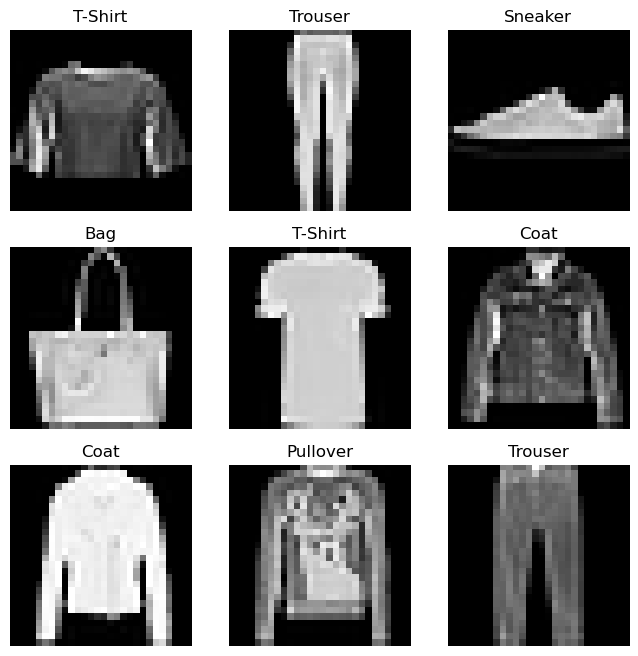

In [416]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
# plt.show()

We pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset, and supports automatic `batching`, `sampling`, `shuffling` and `multiprocess` data loading. 
Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features (Xs) and labels.

100 batch, where each batch has a size at 64

In [417]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


<div align = "center">
    <img src = "https://miro.medium.com/max/1838/1*kcTPIyRkFD7uTKsGulHS3A.png" style = "width:70%">
</div>
<!-- datascience\machine_learning_models\assets\pytorch\tensor-dimension.png -->

In [ ]:
# scalar
torch.tensor(10) # or  torch.tensor([10])
# Rank 1
torch.tensor([10, 5, 9])
# Rank 2
torch.tensor([[10, 5, 9], 
              [10, 5, 9]])
# Rank 3
torch.tensor([[[10, 5, 9], 
              [10, 5, 9]],
              [[10, 5, 9], 
              [10, 5, 9]],
              [[10, 5, 9], 
              [10, 5, 9]]])

# Rank 4
torch.tensor([[[[10, 5, 9], 
              [10, 5, 9]],
              [[10, 5, 9], 
              [10, 5, 9]],
              [[10, 5, 9], 
              [10, 5, 9]]],
              [[[10, 5, 9], 
              [10, 5, 9]],
              [[10, 5, 9], 
              [10, 5, 9]],
              [[10, 5, 9], 
              [10, 5, 9]]]])

The dimension of each image when we load the image is `(1, 28, 28)`, but the images are appended when we load, so we only see `(6000, 28, 28)` as the dimension of the data, that is, the data already appended.

When apply the `batch_size = 64` 
1. Split the data in `int(6000/64)` batches
2. In each batch there are 64 observations, but each is split to original dimencional, that is, `(1, 28, 28)`. So each batch is `Rank 4`.

### Creating Models

To define a neural network in PyTorch, we create a class that inherits from `nn.Module`. 

We define the layers of the network in the `__init__` function and specify how data will pass through the network in the forward function. 

To accelerate operations in the neural network, we move it to the `GPU` if available.

In [418]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        # --> shape --> (64, 10)
        return logits


model = NeuralNetwork()
model.to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


* `28*28` is the width and height of the imagen, but flattened. This is the reason we pass `28*28`, a multiplication.
* `512` is the output to the next layer. This point out the amount of nodes to next layer.
* `Linear()` is the `preactivation function` $\sum WX$
* `ReLU()` is the activation function
* Here we don't pass the output layer since the loss function (`CrossEntropyLoss`) need ``logits`` ($log \frac{Pr(G = 1|X = x)}{Pr(G = K|X = x)} = β_{10} + β_{1}^T x \; ... $) as input to compute the loss

<div align="center">
    <img src="./assets/batch.svg" height="500">
</div>

### Optimizing the Model Parameters

To train a model, we need a `loss function` and an `optimizer`.

The optimizer need to pass the parameters that it will optimize.

In [419]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

##### Cross entropy 

*Surprise*

It's the oppose to *probability*. If an event has higher probability it's means its complement has higher suprise, since its probability is lower. 

A possible meaures of *suprise* is $\frac{1}{p}$, but it has a problem with lower $p$, $\frac{1}{p}$ can grown to $\infty$, so we use a version *log*, so suprise is defined by 
$$log(\frac{1}{p})$$

And the entropy is the expectation of *surprise*, for different events

$$H = \sum_{k=0}^{K-1}\log(\frac{1}{\hat{p}_{k}})p_k$$

For $n^{th}$ record , the output is $(\hat{p}_0, \hat{p}_1, \dots, \hat{p}_{K-1})$

Recall the $n^{th}$ record only can belong to one class. So we can suppose the outcome is $(0, 1, 0, \dots, 0)$, then, its cross-entropy would be 

$$H = \log(\frac{1}{\hat{p}_{0}})0 + \log(\frac{1}{\hat{p}_{1}})1  + ... + \log(\frac{1}{\hat{p}_{K-1}})0 $$
$$H=\log(\frac{1}{\hat{p}_{1}})$$

We can see that if $\hat{p}_{1}$ increases, then $H$ decreases, that is, if the probability  the $n^{th}$ record belong to class $1$ increases, the cross-entropy is reduced.

A way more formal is done

$$L=-\log(\hat{p})$$

The metrics that is reduced is $\sum_{1}^{N}-log(\hat{p})$,  $N$ is size of training data

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.

In [428]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    # model.train() 
    # doesn't directly perform calculus itself, 
    # it sets a crucial flag that enables the model to learn through backpropagation,
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        # pred => (60, 10), 
        # pred is in term of logits
        pred = model(X)
        
        loss = loss_fn(pred, y)

        # sets all parameter gradients to zero.
        # Without resetting, gradients from previous backpropagation steps would accumulate,
        # leading to incorrect updates and potential model instability.
        optimizer.zero_grad()
        # 
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, cumm = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{cumm:>5d}/{size:>5d}]")

<table class="s-table" align = "center">
    <thead>
    <tr>
        <th><code>model.train()</code></th>
        <th><a href="https://stackoverflow.com/a/66843176/9067615"><code>model.eval()</code></a></th>
    </tr>
    </thead>
    <tbody>
        <tr>
            <td>Sets model in <strong>train</strong>ing mode i.e. <br> <br> • <code>BatchNorm</code> layers use per-batch statistics <br> • <code>Dropout</code> layers activated <a href="https://stackoverflow.com/questions/66534762/which-pytorch-modules-are-affected-by-model-eval-and-model-train">etc</a></td>
            <td>Sets model in <strong>eval</strong>uation (inference) mode i.e. <br><br> • <code>BatchNorm</code> layers use running statistics <br> • <code>Dropout</code> layers de-activated etc</td>
        </tr>
    <tr>
        <td></td>
        <td>Equivalent to <code>model.train(False)</code>.</td>
    </tr>
    </tbody>
</table>

* `optimizer.zero_grad()` Sets the gradients of all optimized torch.Tensor s to zero.

* `loss.backward()`

  - It initiates the backward pass of backpropagation.
  - It takes the calculated loss value (e.g., MSE, cross-entropy) and propagates it backward through the computational graph that was created during the forward pass.
  - During this process, it calculates the gradients for each parameter (weights and biases) in all layers of the model. These gradients essentially tell us how much a change in each parameter would affect the overall loss.

* `optimizer.step()` Performs a single optimization step (parameter update).

We also check the model’s performance against the test dataset to ensure it is learning.

In [429]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The training process is conducted over several iterations (epochs). During each epoch, the model learns parameters to make better predictions. We print the model’s accuracy and loss at each epoch; we’d like to see the accuracy increase and the loss decrease with every epoch.

In [431]:
epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n---------------------------]")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.159456  [    0/60000]
loss: 2.156684  [ 6400/60000]
loss: 2.094385  [12800/60000]
loss: 2.107095  [19200/60000]
loss: 2.061434  [25600/60000]
loss: 1.995222  [32000/60000]
loss: 2.030684  [38400/60000]
loss: 1.952778  [44800/60000]
loss: 1.939452  [51200/60000]
loss: 1.883204  [57600/60000]
Test Error: 
 Accuracy: 57.5%, Avg loss: 1.877073 

Epoch 2
-------------------------------
loss: 1.903572  [    0/60000]
loss: 1.888093  [ 6400/60000]
loss: 1.762307  [12800/60000]
loss: 1.800406  [19200/60000]
loss: 1.704656  [25600/60000]
loss: 1.645696  [32000/60000]
loss: 1.671834  [38400/60000]
loss: 1.578195  [44800/60000]
loss: 1.589045  [51200/60000]
loss: 1.498618  [57600/60000]
Test Error: 
 Accuracy: 60.6%, Avg loss: 1.508925 

Epoch 3
-------------------------------
loss: 1.569175  [    0/60000]
loss: 1.549487  [ 6400/60000]
loss: 1.390301  [12800/60000]
loss: 1.463606  [19200/60000]
loss: 1.357040  [25600/60000]
loss: 1.338383  [32000/600

### Saving Models

A common way to save a model is to serialize the internal state dictionary (containing the model parameters).

In [432]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


### Loading Models

The process for loading a model includes re-creating the model structure and loading the state dictionary into it.

In [433]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [434]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
